# IT Jobs and Venues Data Analysis of some North American Cities (USA and Canada)

## 1. Introduction

### i. Background

The decision to immigrate to another country is a very tough one. However, it's common to see many people, especially from developing countries, that decide to do so. They usually follow this path in order to pursue a better quality of life and a better future for their family. People often go to countries that have good standards in terms of health, education and safety.
Most of the time, when somebody decides to immigrate, this means a big move which involves not only city or workplace changes but a whole new experience in terms of culture, food, language, friendship and much more.
Working as a Software Engineer or a Data Scientist may help when deciding to work abroad, because many countries lack professionals in these areas and therefore accept foreign people to fill these roles.

### ii. Problem

When people start studying the possibility to move abroad they want to gather information	regarding job offers, city climate, city safety, school rating, average income, things to do 	there, rent values, and so on. In this study, I selected some of these variables to make an 	analysis comparing some cities from Canada and USA (more specifically Vancouver, 	Toronto, New York, 	Seattle, Austin and San Francisco). The main goal is to help an IT 	worker - who is willing to move abroad - to select one of these cities.

### iii. Interest

People that work in the IT field and are considering to immigrate will be interested in 	reading this material as they might spend a lot of time planning ahead and doing research 	about all the topics involved.


## 2. Data acquisition and cleaning

### i. Data sources

Despite of the fact that somebody planning to immigrate needs to gather a lot of different 	information as listed in (1.ii.), I decided to analyze the following topics: city temperature 	(highs and lows) throughout the year, number of job openings and their average annual 	income and the most common venues for the main neighborhoods for each city. The cities that where chosen for analysis are: Vancouver, Toronto, New York, San Francisco, Austin and Seattle. All of them are cities famous for being home of many high tech companies. The data sources used for this study are described as follows:
    
1. City temperature: web scraping on Wikipedia
    1. [Toronto Data](https://en.wikipedia.org/wiki/Toronto)
    2. [Vancouver Data](https://en.wikipedia.org/wiki/Vancouver)
    3. [New York City Data](https://en.wikipedia.org/wiki/New_York_City)
    4. [San Francisco Data](https://en.wikipedia.org/wiki/San_Francisco)
    5. [Seattle Data](https://en.wikipedia.org/wiki/Seattle)
    6. [Austin Data](https://en.wikipedia.org/wiki/Austin)
2. Number of job openings and their average annual income: web scraping on ziprecruiter
    1. [Data Scientist in Vancouver](https://www.ziprecruiter.com/Jobs/Data-Scientist/-in-Vancouver,BC)
    2. [Software Engineer in Vancouver](https://www.ziprecruiter.com/Jobs/Software-Engineer/-in-Vancouver,BC)
    3. [Data Scientist in Toronto](https://www.ziprecruiter.com/Jobs/Data-Scientist/-in-Toronto,ON)
    4. [Software Engineer in Toronto](https://www.ziprecruiter.com/Jobs/Software-Engineer/-in-Toronto,ON)
    5. [Data Scientist in San Francisco](https://www.ziprecruiter.com/Jobs/Data-Scientist/-in-San-Francisco,CA)
    6. [Software Engineer in San Francisco](https://www.ziprecruiter.com/Jobs/Software-Engineer/-in-San-Francisco,CA)
    7. [Data Scientist in New York](https://www.ziprecruiter.com/Jobs/Data-Scientist/-in-New-York,NY)
    8. [Software Engineer in New York](https://www.ziprecruiter.com/Jobs/Software-Engineer/-in-New-York,NY)
    9. [Data Scientist in Seattle](https://www.ziprecruiter.com/Jobs/Data-Scientist/-in-Seattle,WA)
    10. [Software Engineer in Seattle](https://www.ziprecruiter.com/Jobs/Software-Engineer/-in-Seattle,WA)
    11. [Data Scientist in Austin](https://www.ziprecruiter.com/Jobs/Data-Scientist/-in-Austin,TX)
    12. [Software Engineer in Austin](https://www.ziprecruiter.com/Jobs/Software-Engineer/-in-Austin,TX)
3. Some neighborhoods for each city: some neighborhoods of each city were chosen manually, as it was hard to get this information automatically for all cities. Hence there was not found a webpage where I could get this information from the same pattern, it was not a good choice to use web scraping for 6 totally different pages. However, for Toronto and New York data, I could use previous examples of the Applied Data Science Capstone labs and the data were extracted automatically. 
4. The most common venues for each neighborhood: Foursquare.







  

In [195]:
# Install beautifulsoup4 if necessary
# !conda install -c anaconda beautifulsoup4 --yes 
# !conda install -c conda-forge folium=0.5.0 --yes 
# !conda install -c conda-forge geopy --yes 

# import the required libraries
import pandas as pd
import numpy as np
import requests
import re
from bs4 import BeautifulSoup
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium # map rendering library
from sklearn.cluster import KMeans # import k-means from clustering stage
import json # library to handle JSON files
import matplotlib.cm as cm # Matplotlib and associated plotting modules
import matplotlib.colors as colors

# Dataframe used to store Software Engineer Jobs information
columns_df = ["City", "Income", "Quantity"]
income_se_df = pd.DataFrame(columns=columns_df)    

# Dataframe used to store Data Scientist Jobs information
income_ds_df = pd.DataFrame(columns=columns_df)    

In [196]:
# Function that reads job information given an url (This was used to scrap data from Ziprecruiter)
def get_job_information(income_df, city, url):

    page = requests.get('https://www.ziprecruiter.com/Jobs/'+url)

    # Read the given URL 
    data = BeautifulSoup(page.text, "html.parser")

    # Get the HTML table inside the HTML data read
    salaries = data.find(id="search_filters_salary").find_all("option")

    for salary in salaries:
        if (not salary['value'] == ""):
            start = salary.text.find("(") + 1
            end = salary.text.find(")")
            total = int(salary.text[start: end].replace(",",""))
            income_df = income_df.append({"City": city, "Income": float(salary['value']), "Quantity":total}, ignore_index=True)    
    return income_df
    

### Software Engineer Job information for Toronto

In [197]:
# Get Software Engineer Job information for Toronto
url = 'Software-Engineer/-in-Toronto,ON'
income_se_df = get_job_information(income_se_df, "Toronto", url)
income_se_df.head()

,City,Income,Quantity
0,Toronto,85000.0,2116
1,Toronto,105000.0,1764
2,Toronto,120000.0,1363
3,Toronto,130000.0,977
4,Toronto,145000.0,420


### Data Scientist Job information for Toronto

In [198]:
# Get Data Scientist Job information for Toronto
url = 'Data-Scientist/-in-Toronto,ON'
income_ds_df = get_job_information(income_ds_df, "Toronto", url)
income_ds_df.head()

,City,Income,Quantity
0,Toronto,80000.0,1284
1,Toronto,105000.0,1019
2,Toronto,120000.0,788
3,Toronto,130000.0,579
4,Toronto,145000.0,289


### Software Engineer Job information for Vancouver

In [199]:
# Get Software Engineer Job information for Vancouver
url = 'Software-Engineer/-in-Vancouver,BC'
income_se_df = get_job_information(income_se_df, "Vancouver", url)
income_se_df

,City,Income,Quantity
0,Toronto,85000.0,2116
1,Toronto,105000.0,1764
2,Toronto,120000.0,1363
3,Toronto,130000.0,977
4,Toronto,145000.0,420
5,Vancouver,90000.0,1027
6,Vancouver,110000.0,838
7,Vancouver,120000.0,691
8,Vancouver,130000.0,497
9,Vancouver,145000.0,225


### Data Scientist Job information for Vancouver

In [200]:
# Get Data Scientist Job information for Vancouver
url = 'Data-Scientist/-in-Vancouver,BC'
income_ds_df = get_job_information(income_ds_df, "Vancouver", url)
income_ds_df

,City,Income,Quantity
0,Toronto,80000.0,1284
1,Toronto,105000.0,1019
2,Toronto,120000.0,788
3,Toronto,130000.0,579
4,Toronto,145000.0,289
5,Vancouver,90000.0,451
6,Vancouver,110000.0,375
7,Vancouver,120000.0,292
8,Vancouver,130000.0,223
9,Vancouver,145000.0,106


### Software Engineer Job information for San Francisco

In [201]:
# Get Software Engineer Job information for San Francisco
url = 'Software-Engineer/-in-San-Francisco,CA'
income_se_df = get_job_information(income_se_df, "San Francisco", url)
income_se_df

,City,Income,Quantity
0,Toronto,85000.0,2116
1,Toronto,105000.0,1764
2,Toronto,120000.0,1363
3,Toronto,130000.0,977
4,Toronto,145000.0,420
5,Vancouver,90000.0,1027
6,Vancouver,110000.0,838
7,Vancouver,120000.0,691
8,Vancouver,130000.0,497
9,Vancouver,145000.0,225


### Data Scientist Job information for San Francisco

In [202]:
# Get Data Scientist Job information for San Francisco
url = 'Data-Scientist/-in-San-Francisco,CA'
income_ds_df = get_job_information(income_ds_df, "San Francisco", url)
income_ds_df

,City,Income,Quantity
0,Toronto,80000.0,1284
1,Toronto,105000.0,1019
2,Toronto,120000.0,788
3,Toronto,130000.0,579
4,Toronto,145000.0,289
5,Vancouver,90000.0,451
6,Vancouver,110000.0,375
7,Vancouver,120000.0,292
8,Vancouver,130000.0,223
9,Vancouver,145000.0,106


### Software Engineer Job information for New York

In [203]:
# Get Software Engineer Job information for New York
url = 'Software-Engineer/-in-New-York,NY'   
income_se_df = get_job_information(income_se_df, "New York", url)
income_se_df

,City,Income,Quantity
0,Toronto,85000.0,2116
1,Toronto,105000.0,1764
2,Toronto,120000.0,1363
3,Toronto,130000.0,977
4,Toronto,145000.0,420
5,Vancouver,90000.0,1027
6,Vancouver,110000.0,838
7,Vancouver,120000.0,691
8,Vancouver,130000.0,497
9,Vancouver,145000.0,225


### Data Scientist Job information for New York

In [204]:
# Get Data Scientist Job information for New York
url = 'Data-Scientist/-in-New-York,NY'    
income_ds_df = get_job_information(income_ds_df, "New York", url)
income_ds_df

,City,Income,Quantity
0,Toronto,80000.0,1284
1,Toronto,105000.0,1019
2,Toronto,120000.0,788
3,Toronto,130000.0,579
4,Toronto,145000.0,289
5,Vancouver,90000.0,451
6,Vancouver,110000.0,375
7,Vancouver,120000.0,292
8,Vancouver,130000.0,223
9,Vancouver,145000.0,106


### Software Engineer Job information for Austin

In [205]:
# Get Software Engineer Job information for Austin
url = 'Software-Engineer/-in-Austin,TX'
income_se_df = get_job_information(income_se_df, "Austin", url)
income_se_df

,City,Income,Quantity
0,Toronto,85000.0,2116
1,Toronto,105000.0,1764
2,Toronto,120000.0,1363
3,Toronto,130000.0,977
4,Toronto,145000.0,420
5,Vancouver,90000.0,1027
6,Vancouver,110000.0,838
7,Vancouver,120000.0,691
8,Vancouver,130000.0,497
9,Vancouver,145000.0,225


### Data Scientist Job information for Austin

In [206]:
# Get Data Scientist Job information for Austin
url = 'Data-Scientist/-in-Austin,TX'
income_ds_df = get_job_information(income_ds_df, "Austin", url)
income_ds_df

,City,Income,Quantity
0,Toronto,80000.0,1284
1,Toronto,105000.0,1019
2,Toronto,120000.0,788
3,Toronto,130000.0,579
4,Toronto,145000.0,289
5,Vancouver,90000.0,451
6,Vancouver,110000.0,375
7,Vancouver,120000.0,292
8,Vancouver,130000.0,223
9,Vancouver,145000.0,106


### Software Engineer Job information for Seattle

In [207]:
# Get Data Scientist Job information for Seattle
url = 'Data-Scientist/-in-Seattle,WA'
income_ds_df = get_job_information(income_ds_df, "Seattle", url)
income_ds_df

,City,Income,Quantity
0,Toronto,80000.0,1284
1,Toronto,105000.0,1019
2,Toronto,120000.0,788
3,Toronto,130000.0,579
4,Toronto,145000.0,289
5,Vancouver,90000.0,451
6,Vancouver,110000.0,375
7,Vancouver,120000.0,292
8,Vancouver,130000.0,223
9,Vancouver,145000.0,106


### Data Scientist Job information for Seattle

In [208]:
# Get Software Engineer Job information for Seattle
url = 'Software-Engineer/-in-Seattle,WA'
income_se_df = get_job_information(income_se_df, "Seattle", url)
income_se_df

,City,Income,Quantity
0,Toronto,85000.0,2116
1,Toronto,105000.0,1764
2,Toronto,120000.0,1363
3,Toronto,130000.0,977
4,Toronto,145000.0,420
5,Vancouver,90000.0,1027
6,Vancouver,110000.0,838
7,Vancouver,120000.0,691
8,Vancouver,130000.0,497
9,Vancouver,145000.0,225


### ii. Data cleaning

Since the data sources listed above are HTML pages, it was necessary to do a hard work in order to get the useful information. However, once I found out how to scrap the temperature data (from Wikipedia) and the job information (from ziprecruiter), it was easy to replicate for the cities chosen. After getting the data from the URLs above, I created some Dataframes to store them: 
1. A dataframe with the average temperature per month per city
2. Two dataframes with the number of job openings and their annual income for each city, one for software engineer and other for data scientist roles. 
3. A dataframe with the city chosen neighborhoods and their location (latitude and longitude) in order to get their nearby venues (per neighborhood using Foursquare) and compare the data found in these six cities. 
4. After creating this last dataframe, I used Foursquare to get nearby venues for each neighborhood in order to compare the chosen neighborhoods for each city and see which town offers the best experience for those who are considering to immigrate and establish a life there.

City,Austin,New York,San Francisco,Seattle,Toronto,Vancouver
Income,,,,,,
85000.0,3973,0,0,0,2116,0
90000.0,0,0,0,0,0,1027
95000.0,0,12551,0,0,0,0
105000.0,3307,0,0,8090,1764,0
110000.0,0,0,11844,0,0,838
120000.0,2460,9885,0,0,1363,691
125000.0,0,0,0,6703,0,0
130000.0,1701,8087,0,0,977,497
135000.0,0,0,9296,0,0,0


Text(0, 0.5, '# of oppenings')

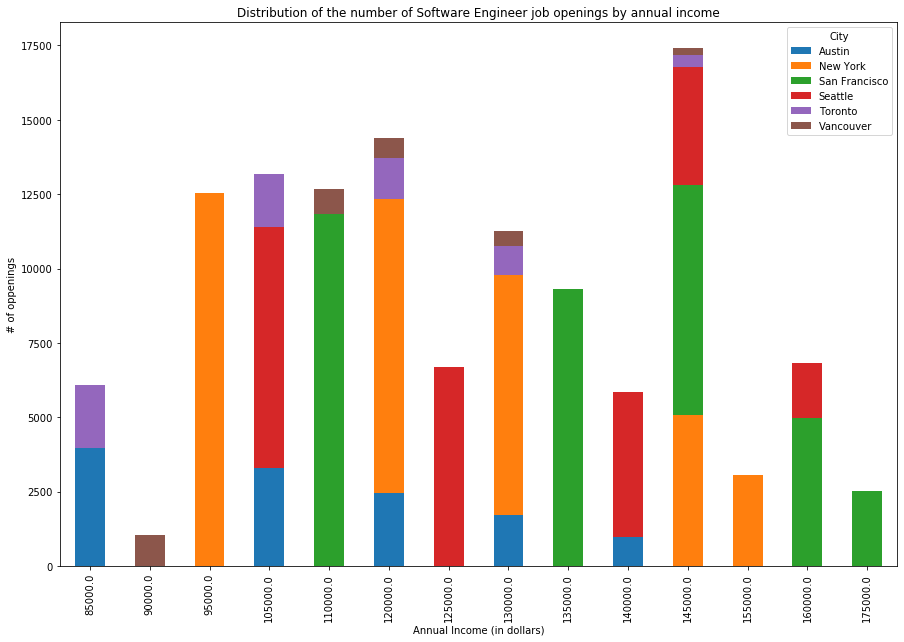

In [209]:
pivot_df = income_se_df.pivot(index='Income', columns='City', values='Quantity')
pivot_df
pivot_df = pivot_df.fillna(0)
display(pivot_df)
pivot_df.plot.bar(stacked=True, figsize=(15,10))
plt.title("Distribution of the number of Software Engineer job openings by annual income")
plt.xlabel("Annual Income (in dollars)")
plt.ylabel("# of oppenings")

City,Austin,New York,San Francisco,Seattle,Toronto,Vancouver
Income,,,,,,
75000.0,1910,0,0,0,0,0
80000.0,0,12092,0,0,1284,0
90000.0,0,0,0,0,0,451
95000.0,0,0,9253,4812,0,0
100000.0,1555,0,0,0,0,0
105000.0,0,9650,0,0,1019,0
110000.0,0,0,0,0,0,375
115000.0,1195,0,0,0,0,0
120000.0,0,0,7555,3907,788,292


Text(0, 0.5, '# of oppenings')

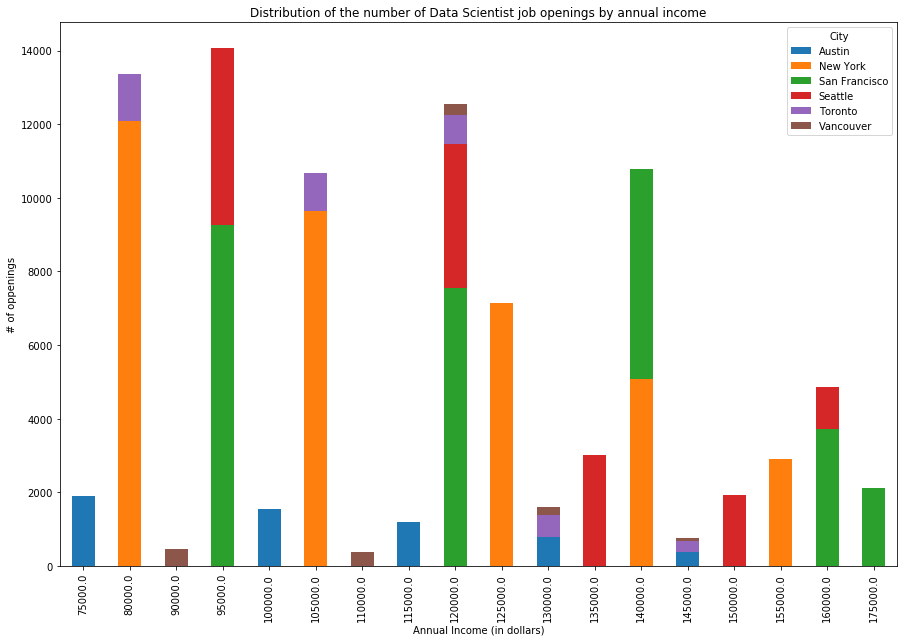

In [210]:
pivot_df = income_ds_df.pivot(index='Income', columns='City', values='Quantity')
pivot_df
pivot_df = pivot_df.fillna(0)
display(pivot_df)
pivot_df.plot.bar(stacked=True, figsize=(15,10))
plt.title("Distribution of the number of Data Scientist job openings by annual income")
plt.xlabel("Annual Income (in dollars)")
plt.ylabel("# of oppenings")

In [211]:
def to_celsius(temp_F):
    #(32 °F − 32) × 5/9 = 0 °C
    return round((temp_F - 32) * (5/9))

def get_temperature_information(url, city, df_t, celsius):

    page = requests.get(url)
    
    # Read the given URL page
    data = BeautifulSoup(page.text, "html.parser")
    # Get the HTML table inside the HTML data read
    tables = data.find_all(class_="infobox")

    low = []
    high = []
    
    # Extracting the HTML data
    for table in tables:
        innerTables = table.find_all(class_="infobox")
    
        get_next_table = True
    
        for innerTable in innerTables:
            trs = innerTable.find_all("tr")
            tr_i = 0

            if get_next_table:
                get_next_table = False

                for tr in trs:
                    tds = tr.find_all("td")
                    tr_i = tr_i + 1

                    if tr_i > 1 and tr_i < 3:
                        i = 0
                        for td in tds:
                            i = i+1
                            divs = td.find_all("div")
                            div_i = 0
                            for div in divs:
                                div_i = div_i + 1

                                if div_i == 7:
                                    if celsius:
                                        value = re.sub(r'[^\x00-\x7F]+','-', div.text)
                                        value = int(value)
                                    else:
                                        value = to_celsius(int(div.text))
                                    high.append(value)
                                elif div_i == 8:
                                    if celsius:
                                        value = re.sub(r'[^\x00-\x7F]+','-', div.text)
                                        value = int(value)
                                    else:
                                        value = to_celsius(int(div.text))
                                    low.append(value)


    df = pd.DataFrame(columns=["January","February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December", "Type"])
    low.append("Min")
    high.append("Max")

    a_series = pd.Series(high, index = df.columns)
    df = df.append(a_series, ignore_index=True)
    a_series = pd.Series(low, index = df.columns)
    df = df.append(a_series, ignore_index=True)

    a_series = pd.Series(df.mean(axis = 0), index = df_t.columns)
    df_t = df_t.append(a_series, ignore_index=True)
    df_t = df_t.replace(np.nan, city)
    
    df.set_index('Type', inplace=True)
    df = df.transpose()
    
    df.plot(kind="bar", figsize=(14, 8), color=('#DD5437','#2A9FD1'))
    plt.title("Maximum and Minimum average temperature per month in " + city)
    plt.xlabel("Month")
    plt.ylabel("Temperature")
    plt.grid()
    plt.show()
    
    return df_t

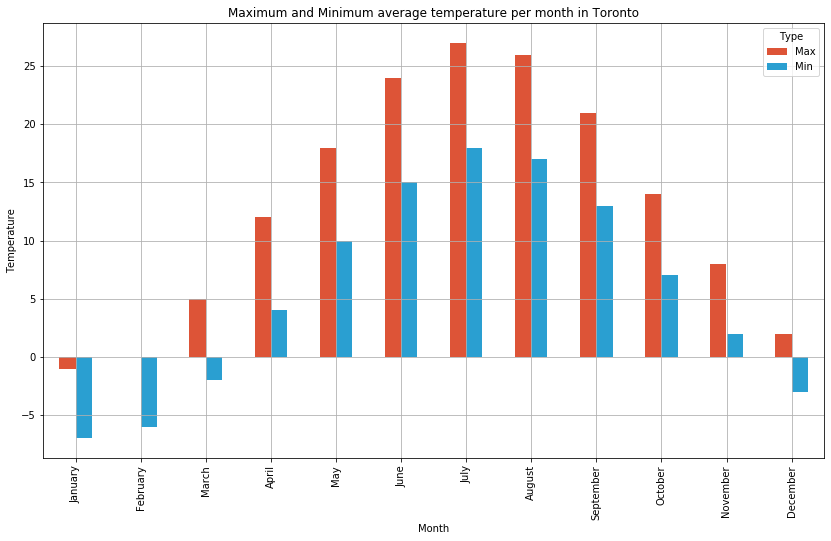

,January,February,March,April,May,June,July,August,September,October,November,December,City
0,-4.0,-3.0,1.5,8.0,14.0,19.5,22.5,21.5,17.0,10.5,5.0,-0.5,Toronto


In [212]:
url = 'https://en.wikipedia.org/wiki/Toronto'
avg_temperature = pd.DataFrame(columns=["January","February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December", "City"])
avg_temperature = get_temperature_information(url, "Toronto", avg_temperature, True)
avg_temperature.head()

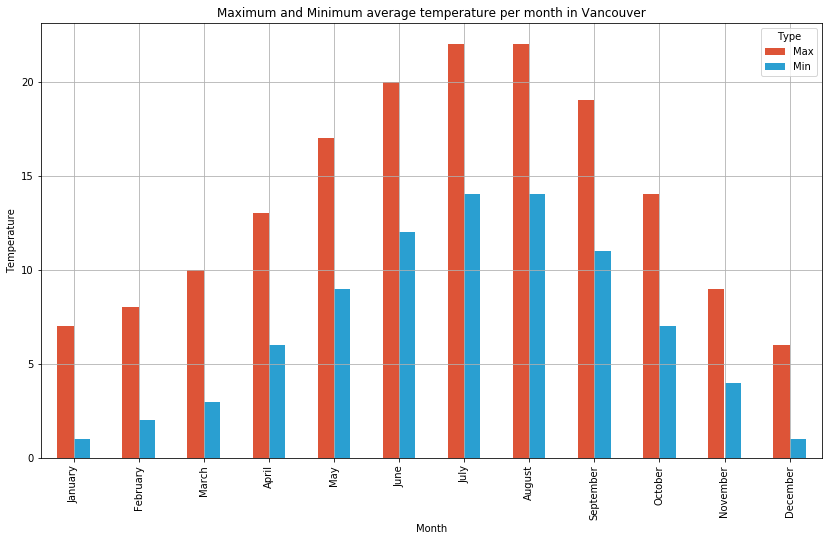

In [213]:
url = 'https://en.wikipedia.org/wiki/Vancouver'
avg_temperature = get_temperature_information(url, "Vancouver", avg_temperature, True)

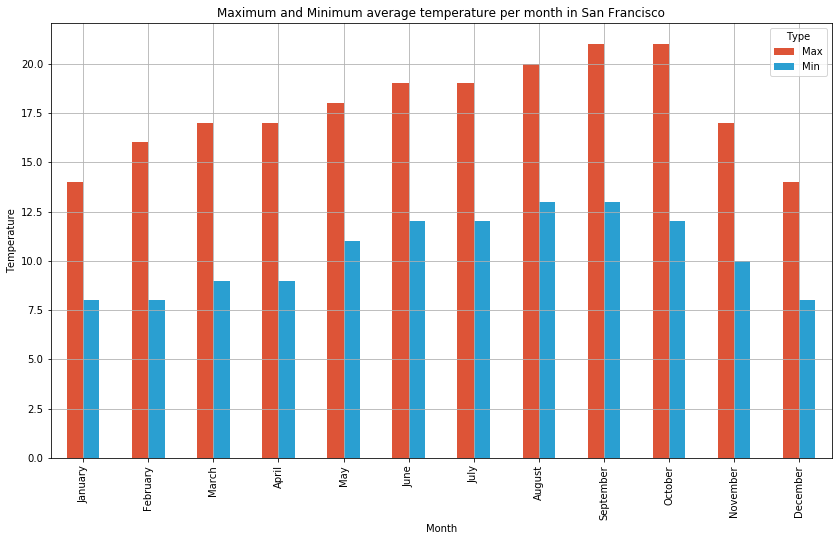

In [214]:
url = 'https://en.wikipedia.org/wiki/San_Francisco'
avg_temperature = get_temperature_information(url, "San Francisco", avg_temperature, False)

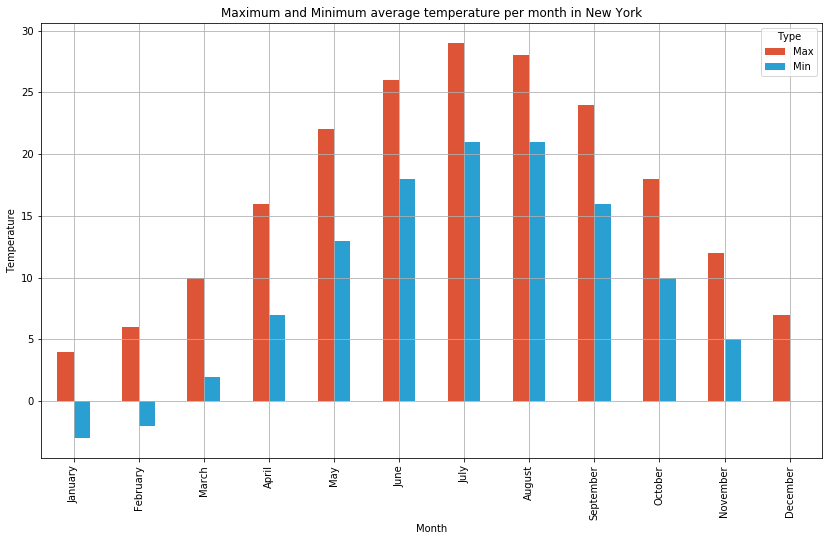

In [215]:
url = 'https://en.wikipedia.org/wiki/New_York_City'
avg_temperature = get_temperature_information(url, "New York", avg_temperature, False)

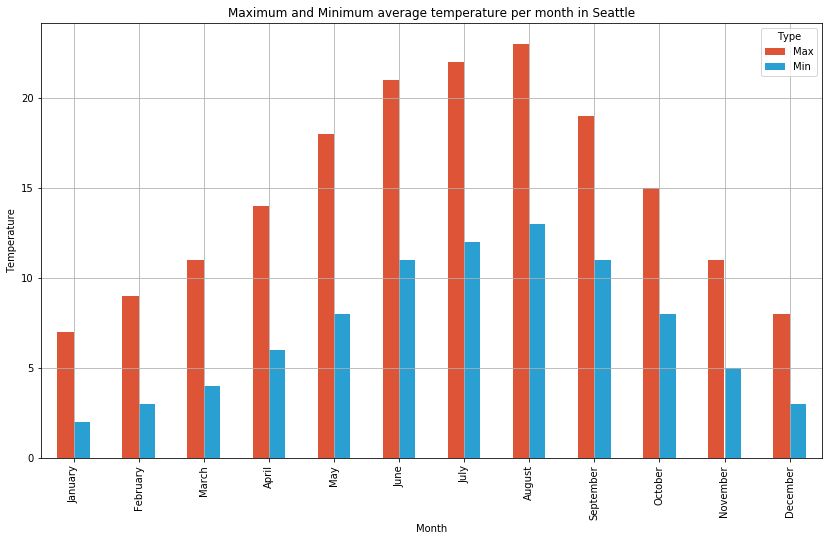

In [216]:
url = 'https://en.wikipedia.org/wiki/Seattle'
avg_temperature = get_temperature_information(url, "Seattle", avg_temperature, False)


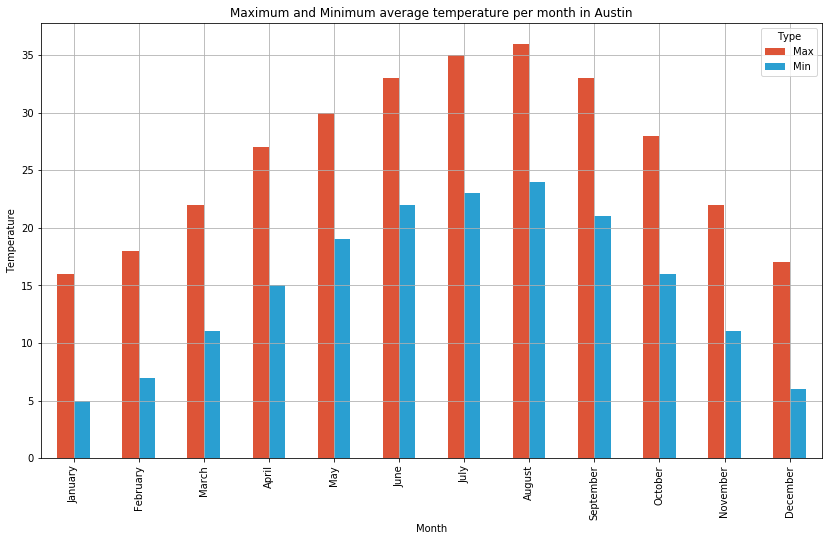

In [217]:
url = 'https://en.wikipedia.org/wiki/Austin'
avg_temperature = get_temperature_information(url, "Austin", avg_temperature, False)

In [218]:
avg_temperature.set_index('City', inplace=True)
display(avg_temperature)

,January,February,March,April,May,June,July,August,September,October,November,December
City,,,,,,,,,,,,
Toronto,-4.0,-3.0,1.5,8.0,14.0,19.5,22.5,21.5,17.0,10.5,5.0,-0.5
Vancouver,4.0,5.0,6.5,9.5,13.0,16.0,18.0,18.0,15.0,10.5,6.5,3.5
San Francisco,11.0,12.0,13.0,13.0,14.5,15.5,15.5,16.5,17.0,16.5,13.5,11.0
New York,0.5,2.0,6.0,11.5,17.5,22.0,25.0,24.5,20.0,14.0,8.5,3.5
Seattle,4.5,6.0,7.5,10.0,13.0,16.0,17.0,18.0,15.0,11.5,8.0,5.5
Austin,10.5,12.5,16.5,21.0,24.5,27.5,29.0,30.0,27.0,22.0,16.5,11.5


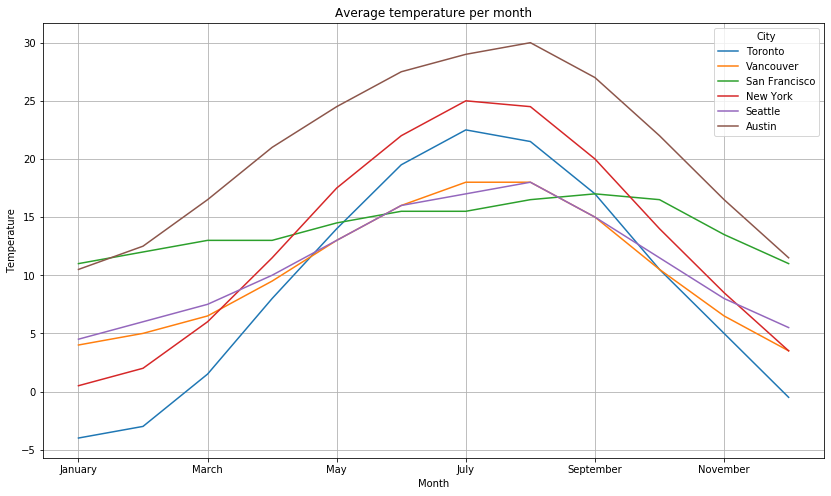

In [219]:
avg_temperature = avg_temperature.transpose()
avg_temperature.plot(kind="line", figsize=(14, 8))
plt.title("Average temperature per month")
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.grid()
plt.show()

In [220]:
CLIENT_ID = 'TB2N2LFHSQ0NEA3ICVU2QRJALSCWYL0NDBS3J323SCT0JLHU' # your Foursquare ID
CLIENT_SECRET = 'UXGXAAXBDFDCABLS2KFYD2BPEYNRKTVVLN2GOWO3PEONRYPJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TB2N2LFHSQ0NEA3ICVU2QRJALSCWYL0NDBS3J323SCT0JLHU
CLIENT_SECRET:UXGXAAXBDFDCABLS2KFYD2BPEYNRKTVVLN2GOWO3PEONRYPJ


In [221]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [222]:
# function that get nearby venues given latitude,longitude and radius
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    #i = 0
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        #i = i + 1
        LIMIT = 300        
        # create the API request URL
        
        #if i < 50:
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

        # make the request
        jsonBlob = requests.get(url, "none").json()
        if 'response' in jsonBlob and 'groups' in jsonBlob['response']:

            results = jsonBlob["response"]['groups'][0]['items']

            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
        else:
            print("No venue info for " + name)
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return nearby_venues

In [223]:
#cities = pd.DataFrame(columns=["City", "Neighborhood", "Latitude", "Longitude"])

url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
page = requests.get(url)
# Read the URL page at Wikipedia
data = BeautifulSoup(page.text, "html.parser")

# Get the HTML table inside the HTML data read
table = data.find('table')

# Get all the rows of the HTML table
table_rows = table.find_all('tr')

# Get the header TH
header = table_rows[0].find_all('th')

# Get the column values (TD) of the header TH, which will be the column labels of the dataframe
labels = [table_rows[0].text for table_rows[0] in header]
# Clean the '\n' special character
labels = np.char.replace(labels, '\n', '')

# Create the dataframe
# The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
df = pd.DataFrame(columns = labels)

# Get all the other columns (TD) from the rows (TR)
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    # Ignore the first row (header) and the rows which have "Not assigned" boroughs
    # Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned
    if (row != [] and row[1] != "Not assigned\n"):
        row = pd.Series(row,labels)
        df = df.append([row],ignore_index=True)     

# Clean the data removing '\n'        
df.replace('\n','', regex=True, inplace=True)   

# Read the geospatial data csv
geospatial = pd.read_csv("http://cocl.us/Geospatial_data") 

# Change the dataframes indexes, in order to make it possible to merge them later
df.set_index('Postal Code', inplace=True)
geospatial.set_index('Postal Code', inplace=True)

# Merge both dataframes
cities = df.merge(geospatial, left_index=True, right_index=True)

cities.reset_index(inplace=True)
cities.drop('Postal Code', axis=1, inplace=True)

# Work with only boroughs that contain the word Toronto 
cities = cities[cities['Borough'].str.contains("Toronto")].reset_index(drop=True)
cities.drop('Borough', axis=1, inplace=True)
cities['City'] = "Toronto"

# Define City as the first column
cols = cities.columns.tolist()
cols = cols[-1:] + cols[:-1]
cities = cities[cols]

cities

,City,Neighborhood,Latitude,Longitude
0,Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,Toronto,St. James Town,43.651494,-79.375418
4,Toronto,The Beaches,43.676357,-79.293031
5,Toronto,Berczy Park,43.644771,-79.373306
6,Toronto,Central Bay Street,43.657952,-79.387383
7,Toronto,Christie,43.669542,-79.422564
8,Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
9,Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


In [224]:
def get_latitude_longitude(city, neighborhood, cities_df, state):
    
    address = neighborhood + ", " + city + ", " + state
    print(address)
    geolocator = Nominatim(user_agent="on_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    cities_df = cities_df.append({"City": city, "Neighborhood": neighborhood, "Latitude":latitude, "Longitude":longitude}, ignore_index=True)
    return cities_df

In [225]:
cities = get_latitude_longitude("Vancouver", "Arbutus ridge", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Downtown", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Dunbar-Southlands", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Fairview", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Grandview-Woodland", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Hastings-Sunrise", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Kensington-Cedar Cottage", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Kerrisdale", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Killarney", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Kitsilano", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Marpole", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Mount Pleasant", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Renfrew-Collingwood", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Riley Park", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Shaughnessy", cities, "BC")
cities = get_latitude_longitude("Vancouver", "South Cambie", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Strathcona", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Sunset", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Victoria-Fraserview", cities, "BC")
cities = get_latitude_longitude("Vancouver", "West End", cities, "BC")
cities = get_latitude_longitude("Vancouver", "West Point Grey", cities, "BC")


Arbutus ridge, Vancouver, BC
Downtown, Vancouver, BC
Dunbar-Southlands, Vancouver, BC
Fairview, Vancouver, BC
Grandview-Woodland, Vancouver, BC
Hastings-Sunrise, Vancouver, BC
Kensington-Cedar Cottage, Vancouver, BC
Kerrisdale, Vancouver, BC
Killarney, Vancouver, BC
Kitsilano, Vancouver, BC
Marpole, Vancouver, BC
Mount Pleasant, Vancouver, BC
Renfrew-Collingwood, Vancouver, BC
Riley Park, Vancouver, BC
Shaughnessy, Vancouver, BC
South Cambie, Vancouver, BC
Strathcona, Vancouver, BC
Sunset, Vancouver, BC
Victoria-Fraserview, Vancouver, BC
West End, Vancouver, BC
West Point Grey, Vancouver, BC


In [226]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
    
neighborhoods_data = newyork_data['features']

for data in neighborhoods_data:
    if data['properties']['borough'] == 'Manhattan':
        neighborhood_name = data['properties']['name']

        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]

        cities = cities.append({'City': 'New York', 'Neighborhood': neighborhood_name, 'Latitude': neighborhood_lat, 'Longitude': neighborhood_lon}, ignore_index=True)

    

Data downloaded!


In [227]:
cities = get_latitude_longitude("San Francisco", "Fisher", cities, "CA")
cities = get_latitude_longitude("San Francisco", "North Beach", cities, "CA")
cities = get_latitude_longitude("San Francisco", "Chinatown", cities, "CA")
cities = get_latitude_longitude("San Francisco", "Financial District", cities, "CA")
cities = get_latitude_longitude("San Francisco", "Union Square", cities, "CA")
cities = get_latitude_longitude("San Francisco", "Central Market", cities, "CA")
cities = get_latitude_longitude("San Francisco", "SOMA", cities, "CA")
cities = get_latitude_longitude("San Francisco", "Civic Center", cities, "CA")
cities = get_latitude_longitude("San Francisco", "Japantown", cities, "CA")
cities = get_latitude_longitude("San Francisco", "Bayview", cities, "CA")
cities = get_latitude_longitude("San Francisco", "Mission District", cities, "CA")
cities = get_latitude_longitude("San Francisco", "Sunset", cities, "CA")


Fisher, San Francisco, CA
North Beach, San Francisco, CA
Chinatown, San Francisco, CA
Financial District, San Francisco, CA
Union Square, San Francisco, CA
Central Market, San Francisco, CA
SOMA, San Francisco, CA
Civic Center, San Francisco, CA
Japantown, San Francisco, CA
Bayview, San Francisco, CA
Mission District, San Francisco, CA
Sunset, San Francisco, CA


In [228]:
cities = get_latitude_longitude("Seattle", "International District", cities, "WA")
cities = get_latitude_longitude("Seattle", "Eastlake", cities, "WA")
cities = get_latitude_longitude("Seattle", "Retail District", cities, "WA")
cities = get_latitude_longitude("Seattle", "West Edge", cities, "WA")
cities = get_latitude_longitude("Seattle", "Broadview", cities, "WA")
cities = get_latitude_longitude("Seattle", "Cedar Park", cities, "WA")
cities = get_latitude_longitude("Seattle", "Pioneer Square", cities, "WA")
cities = get_latitude_longitude("Seattle", "Highland Park", cities, "WA")
cities = get_latitude_longitude("Seattle", "Capitol Hill", cities, "WA")
cities = get_latitude_longitude("Seattle", "Downtown", cities, "WA")
cities = get_latitude_longitude("Seattle", "First Hill", cities, "WA")


International District, Seattle, WA
Eastlake, Seattle, WA
Retail District, Seattle, WA
West Edge, Seattle, WA
Broadview, Seattle, WA
Cedar Park, Seattle, WA
Pioneer Square, Seattle, WA
Highland Park, Seattle, WA
Capitol Hill, Seattle, WA
Downtown, Seattle, WA
First Hill, Seattle, WA


In [229]:
cities = get_latitude_longitude("Austin", "Downtown", cities, "TX")
cities = get_latitude_longitude("Austin", "Hancock", cities, "TX")
cities = get_latitude_longitude("Austin", "Heritage", cities, "TX")
cities = get_latitude_longitude("Austin", "West Downtown", cities, "TX")
cities = get_latitude_longitude("Austin", "Rosedale", cities, "TX")



Downtown, Austin, TX
Hancock, Austin, TX
Heritage, Austin, TX
West Downtown, Austin, TX
Rosedale, Austin, TX


In [230]:
display(cities)
venues = getNearbyVenues(names=cities['Neighborhood'], latitudes=cities['Latitude'], longitudes=cities['Longitude'])

,City,Neighborhood,Latitude,Longitude
0,Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,Toronto,St. James Town,43.651494,-79.375418
4,Toronto,The Beaches,43.676357,-79.293031
...,...,...,...,...
123,Austin,Downtown,30.268054,-97.744764
124,Austin,Hancock,30.295896,-97.724768
125,Austin,Heritage,30.345796,-97.690991
126,Austin,West Downtown,30.268054,-97.744764


Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West,  Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport


In [231]:
# one hot encoding
venues_one_hot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")
venues_one_hot.head()

,ATM,Acai House,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,...,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [232]:
venues_one_hot

,ATM,Acai House,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,...,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6742,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [233]:
# add neighborhoods column back to dataframe
venues_one_hot['Neighborhoods'] = venues['Neighborhood'] 

print(venues_one_hot.shape)

# move neighborhoods column to the first column
fixed_columns = [venues_one_hot.columns[-1]] + list(venues_one_hot.columns[:-1])
venues_one_hot = venues_one_hot[fixed_columns]
venues_one_hot.head()

(6747, 416)


,Neighborhoods,ATM,Acai House,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Lounge,...,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [234]:
venues_grouped = venues_one_hot.groupby('Neighborhoods').mean().reset_index()
venues_grouped

,Neighborhoods,ATM,Acai House,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Lounge,...,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Arbutus ridge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,Battery Park City,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.015152,0.030303,0.0,0.015152,0.000000,0.000000
2,Bayview,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,Berczy Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,Broadview,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,West Downtown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.010526,0.000000
114,West Edge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.010753,0.0,0.000000,0.010753,0.0,0.000000,0.000000,0.010753
115,West End,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.016393,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.016393,0.000000,0.000000
116,West Point Grey,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.022727,0.0,0.022727,0.022727,0.000000


In [235]:
num_top_venues = 5

for hood in venues_grouped['Neighborhoods']:
    print("----"+hood+"----")
    temp = venues_grouped[venues_grouped['Neighborhoods'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arbutus ridge----
            venue  freq
0          Bakery   0.2
1             Spa   0.2
2   Grocery Store   0.2
3  Nightlife Spot   0.2
4       Pet Store   0.2


----Battery Park City----
           venue  freq
0           Park  0.12
1    Coffee Shop  0.08
2          Hotel  0.06
3  Memorial Site  0.05
4            Gym  0.05


----Bayview----
                             venue  freq
0               Mexican Restaurant  0.17
1                           Bakery  0.17
2  Southern / Soul Food Restaurant  0.17
3                         Pharmacy  0.08
4                  Piercing Parlor  0.08


----Berczy Park----
                venue  freq
0         Coffee Shop  0.07
1        Cocktail Bar  0.05
2  Seafood Restaurant  0.03
3         Cheese Shop  0.03
4              Bakery  0.03


----Broadview----
                    venue  freq
0        Sushi Restaurant  0.11
1             Video Store  0.11
2  Furniture / Home Store  0.11
3         Thai Restaurant  0.11
4       Convenience Store  0.11




In [236]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [237]:
num_top_venues = 15

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhoods']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhoods'] = venues_grouped['Neighborhoods']

for ind in np.arange(venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Arbutus ridge,Pet Store,Spa,Grocery Store,Bakery,Nightlife Spot,Zoo,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant
1,Battery Park City,Park,Coffee Shop,Hotel,Memorial Site,Gym,Playground,Shopping Mall,Food Court,Boat or Ferry,Gourmet Shop,Plaza,Wine Shop,Burger Joint,Scenic Lookout,Steakhouse
2,Bayview,Southern / Soul Food Restaurant,Mexican Restaurant,Bakery,Pool,Dance Studio,Café,Pharmacy,Gym,Piercing Parlor,Cultural Center,Farmers Market,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Coworking Space
3,Berczy Park,Coffee Shop,Cocktail Bar,Restaurant,Seafood Restaurant,Bakery,Pub,Café,Beer Bar,Cheese Shop,Thai Restaurant,Greek Restaurant,Bagel Shop,Gourmet Shop,Tailor Shop,Basketball Stadium
4,Broadview,Food Truck,Furniture / Home Store,Beer Bar,Sushi Restaurant,Antique Shop,Video Store,Thai Restaurant,Convenience Store,Pizza Place,Flea Market,Exhibit,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store


In [238]:
# set number of clusters
kclusters = 5

grouped_clustering = venues_grouped.drop('Neighborhoods', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [239]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

neighborhoods_venues_sorted


,Cluster Labels,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,1,Arbutus ridge,Pet Store,Spa,Grocery Store,Bakery,Nightlife Spot,Zoo,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant
1,1,Battery Park City,Park,Coffee Shop,Hotel,Memorial Site,Gym,Playground,Shopping Mall,Food Court,Boat or Ferry,Gourmet Shop,Plaza,Wine Shop,Burger Joint,Scenic Lookout,Steakhouse
2,1,Bayview,Southern / Soul Food Restaurant,Mexican Restaurant,Bakery,Pool,Dance Studio,Café,Pharmacy,Gym,Piercing Parlor,Cultural Center,Farmers Market,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Coworking Space
3,1,Berczy Park,Coffee Shop,Cocktail Bar,Restaurant,Seafood Restaurant,Bakery,Pub,Café,Beer Bar,Cheese Shop,Thai Restaurant,Greek Restaurant,Bagel Shop,Gourmet Shop,Tailor Shop,Basketball Stadium
4,1,Broadview,Food Truck,Furniture / Home Store,Beer Bar,Sushi Restaurant,Antique Shop,Video Store,Thai Restaurant,Convenience Store,Pizza Place,Flea Market,Exhibit,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,1,West Downtown,Bar,Coffee Shop,Hotel,Italian Restaurant,Cocktail Bar,New American Restaurant,Lounge,Juice Bar,Sushi Restaurant,Grocery Store,BBQ Joint,Restaurant,Steakhouse,Speakeasy,Seafood Restaurant
114,1,West Edge,Seafood Restaurant,Coffee Shop,Gift Shop,Boat or Ferry,Clothing Store,Theme Park Ride / Attraction,Aquarium,Cocktail Bar,Burger Joint,Hotel,Mexican Restaurant,Park,Bakery,American Restaurant,Sandwich Place
115,1,West End,Bakery,Greek Restaurant,Sushi Restaurant,Japanese Restaurant,Dessert Shop,Ramen Restaurant,Coffee Shop,Breakfast Spot,Park,American Restaurant,Café,Restaurant,Indian Restaurant,Gay Bar,Farmers Market
116,1,West Point Grey,Café,Japanese Restaurant,Bookstore,Vegetarian / Vegan Restaurant,Bakery,Sporting Goods Shop,Coffee Shop,Bus Station,Pub,Sushi Restaurant,Pizza Place,Dessert Shop,Gastropub,Liquor Store,Bar


In [240]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
cities_merged = cities
cities_merged = cities_merged.join(neighborhoods_venues_sorted.set_index('Neighborhoods'), on='Neighborhood')

cities_merged.head() 


,City,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1.0,Coffee Shop,Pub,Bakery,Park,Theater,Restaurant,Breakfast Spot,Café,Farmers Market,Bank,Beer Store,French Restaurant,Mexican Restaurant,Spa,Shoe Store
1,Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1.0,Coffee Shop,Sushi Restaurant,Creperie,Bar,College Auditorium,Distribution Center,Theater,Gym,Restaurant,Bank,Beer Bar,Discount Store,Sandwich Place,Café,Music Venue
2,Toronto,"Garden District, Ryerson",43.657162,-79.378937,1.0,Clothing Store,Coffee Shop,Café,Cosmetics Shop,Middle Eastern Restaurant,Japanese Restaurant,Italian Restaurant,Bubble Tea Shop,Fast Food Restaurant,Bakery,Tea Room,Theater,Ramen Restaurant,Diner,Bookstore
3,Toronto,St. James Town,43.651494,-79.375418,1.0,Café,Coffee Shop,Cocktail Bar,American Restaurant,Gastropub,Restaurant,Italian Restaurant,Lingerie Store,Gym,Theater,Seafood Restaurant,Art Gallery,Moroccan Restaurant,Beer Bar,Clothing Store
4,Toronto,The Beaches,43.676357,-79.293031,1.0,Pub,Health Food Store,Neighborhood,Trail,Zoo,Exhibit,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space


In [241]:
latitude = 43.651070
longitude = -79.347015

# create map
map_clusters = folium.Map(width=500,height=500,location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []

toronto = cities_merged.loc[cities_merged['City'] == "Toronto"]

for lat, lon, poi, cluster in zip(toronto['Latitude'], toronto['Longitude'], toronto['Neighborhood'], toronto['Cluster Labels']):

    if not math.isnan(cluster):
        cluster_i = int(cluster) 
    
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster_i), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster_i-1],
            fill=True,
            fill_color=rainbow[cluster_i-1],
            fill_opacity=0.7).add_to(map_clusters)

map_clusters


In [242]:
latitude = 49.24966
longitude = -123.11934

# create map
map_clusters = folium.Map(width=500,height=500,location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
vancouver = cities_merged.loc[cities_merged['City'] == "Vancouver"]
for lat, lon, poi, cluster in zip(vancouver['Latitude'], vancouver['Longitude'], vancouver['Neighborhood'], vancouver['Cluster Labels']):

    if not math.isnan(cluster):
        cluster_i = int(cluster) 
    
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster_i), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster_i-1],
            fill=True,
            fill_color=rainbow[cluster_i-1],
            fill_opacity=0.7).add_to(map_clusters)

map_clusters



In [243]:
latitude = 40.7829
longitude = -73.9654

# create map
map_clusters = folium.Map(width=500,height=500,location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
newyork = cities_merged.loc[cities_merged['City'] == "New York"]
for lat, lon, poi, cluster in zip(newyork['Latitude'], newyork['Longitude'], newyork['Neighborhood'], newyork['Cluster Labels']):

    if not math.isnan(cluster):
        cluster_i = int(cluster) 
    
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster_i), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster_i-1],
            fill=True,
            fill_color=rainbow[cluster_i-1],
            fill_opacity=0.7).add_to(map_clusters)

map_clusters




In [244]:
latitude = 37.7749
longitude = -122.4194

# create map
map_clusters = folium.Map(width=500,height=500,location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
sanfran = cities_merged.loc[cities_merged['City'] == "San Francisco"]
for lat, lon, poi, cluster in zip(sanfran['Latitude'], sanfran['Longitude'], sanfran['Neighborhood'], sanfran['Cluster Labels']):

    if not math.isnan(cluster):
        cluster_i = int(cluster) 
    
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster_i), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster_i-1],
            fill=True,
            fill_color=rainbow[cluster_i-1],
            fill_opacity=0.7).add_to(map_clusters)

map_clusters


In [245]:
latitude = 30.2672
longitude = -97.7431

# create map
map_clusters = folium.Map(width=500,height=500,location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
austin = cities_merged.loc[cities_merged['City'] == "Austin"]
for lat, lon, poi, cluster in zip(austin['Latitude'], austin['Longitude'], austin['Neighborhood'], austin['Cluster Labels']):

    if not math.isnan(cluster):
        cluster_i = int(cluster) 
    
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster_i), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster_i-1],
            fill=True,
            fill_color=rainbow[cluster_i-1],
            fill_opacity=0.7).add_to(map_clusters)

map_clusters


In [246]:
latitude = 47.6062
longitude = -122.3321

# create map
map_clusters = folium.Map(width=500,height=500,location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
seattle = cities_merged.loc[cities_merged['City'] == "Seattle"]
for lat, lon, poi, cluster in zip(seattle['Latitude'], seattle['Longitude'], seattle['Neighborhood'], seattle['Cluster Labels']):

    if not math.isnan(cluster):
        cluster_i = int(cluster) 
    
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster_i), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster_i-1],
            fill=True,
            fill_color=rainbow[cluster_i-1],
            fill_opacity=0.7).add_to(map_clusters)

map_clusters
